<a href="https://colab.research.google.com/github/dusanpython66/pravdepodobnost/blob/main/3.%20Axiomatick%C3%A1%20definice%20pravd%C4%9Bpodobnosti/pravdepodobnost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pravděpodobnost

**Příklad (Narozeninový problém).**

Předpokládejme, že v místnosti je k osob. Předpokládejme, že termín 29. února vylučujeme a že každý termín narozenin u osob je stejně pravděpodobný. Dále předpokládejme, že narozeniny jedné osoby nijak neovlivnňuje termín narozenin jiné osoby. Jaká je pravděpodobnost , že alespoň jeden pár osob má narozeniny ve stejný den?

**Řešení.**

$$
P(k) = 1 - (365\cdot 364\cdots \cdot (365 - k + 1)) / 365^k.
$$

In [ ]:
def P(k):
    var("i")
    return 1 - product((365 - i), i, 0, k - 1) / 365^k

In [ ]:
P(2)

1/365

In [ ]:
narozeniny = set([i for i in range(1,366)])
def pravd(k):
    p = (Subsets(narozeniny, k)).cardinality() * factorial(k) / 365^k     
    return 1 - p

In [ ]:
pravd(2)

1/365

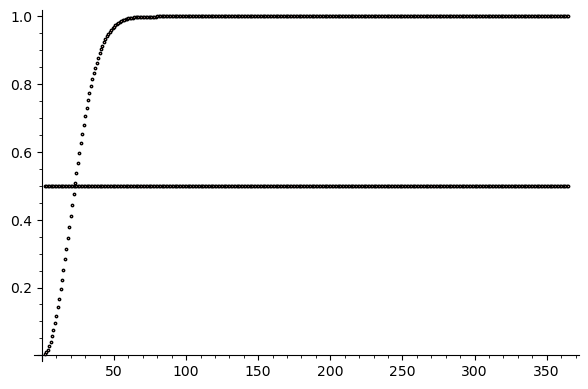

In [ ]:
p1 = scatter_plot([(k, pravd(k)) for k in range(2,366) ], markersize=3)
p2 = scatter_plot([(k, 0.5) for k in range(2, 366)], markersize=3)
(p1 + p2).show()

In [ ]:
exists([k for k in range(2, 366)], lambda k: pravd(k) > 1/2)

(True, 23)

In [ ]:
float(pravd(40)) * 100   # pravděpodobnost pro k = 40

89.1231809817949

Závěr: k tomu, aby pravděpodobnost výskytu dvojice se stejným datem narození přesáhla 0.5 stačí, aby v místnosti bylo 23 lidí !

**Příklad.**

Předpokládejme náhodný pokus, při němž se hází dvěma férovými kostkami. Co je potom pravěpodobnější, že hodíme součet 11 nebo součet 12 ?

**Řešení.**


In [ ]:
S = cartesian_product([set([1, 2, 3, 4, 5, 6]), set([1, 2, 3, 4, 5, 6])])
S.cardinality()
for dvojice in S:
    if dvojice[0] + dvojice[1] == 11:
        print(dvojice)

(5, 6)
(6, 5)


In [ ]:
S.cardinality()
T = set(u for u in S if u[0] + u[1] == 11)
print(T)
U = set(u for u in S if u[0] + u[1] == 12)
print(U)

{(5, 6), (6, 5)}
{(6, 6)}


# Podmíněná pravděpodobnost

**Příklad (Monty-Hall problem).**



Označme nejdříve dveře čísly 1, 2 a 3 a bez újmy na obecnosti předpokládejme, že účastník soutěže vybral dveře č. 1. Pokud by vybral jiné dveře, pak můžeme dveře přečíslovat tak, aby měly zvolené dveře číslo 1. Dále označme jako $A_i$ náhodný jev, kdy je auto za dveřmi s číslem i, i= 1,2,3. Dále nechť $V$ označuje jev kdy hráč získá auto. Konečně předpokládejme, že hráč změnil volbu dveří. Tudíž pokud je auto schováno za dveřmi č. 1 hráč prohrává a  platí tedy: $\mathbb P(V|A_1) = 0.$ V ostatních případech hráč vyhrává a tedy platí:
$$
\mathbb P(V|A_2) = \mathbb P(V|A_3) = 1.
$$
Pak tedy plze psát:
$$
\mathbb P(V) = \mathbb P(V|A_1)\cdot\mathbb P(A_1) + \mathbb P(V|A_2)\cdot\mathbb P(A_2) + \mathbb P(V|A_3)\cdot\mathbb P(A_3) = 
0\cdot\frac{1}{3} + 1\cdot\frac{1}{3} + 1\cdot\frac{1}{3} = \frac{2}{3}.
$$

Základní prostor lze zapsat takto:
$$
S = \{A_1D_2, A_1D_3, A_2D_3, A_3D_2\}
$$
Uspořádaná dvojice $(A_i, D_j)$ pak reprentuje stav, kdy je auto za dveřmi $A_i$ a Monty otevřel dveře $D_j.$ Nyní předpokládejme, že Monty otevřel dveře $D_2.$ Nyní zřejmě $\mathbb P(D_2|A_1) = \mathbb P(D_3|A_1) = 1/2.$ Dále pak máme:
$$
\mathbb P(D_2) = \mathbb P(\text{"Monty otevřel dveře 2"}) = \mathbb P(A_1D_2) + \mathbb P(A_3D_2) = \frac{1}{3}\cdot\frac{1}{2} + \frac{1}{3}\cdot 1 = \frac{1}{2},
$$

$$
\mathbb P(D_3) = \mathbb P(A_1D_3) + \mathbb P(A_2D_3) = \frac{1}{3}\cdot\frac{1}{2} + \frac{1}{3}\cdot 1 = \frac{1}{2}.
$$

Z Bayesovy formule dostáváme potom:
$$
\mathbb P(A_1|D_2) = \frac{\mathbb P(D_2|A_1)\mathbb P(A_1)}{\mathbb P(D_2)} = \frac{\frac{1}{2}\cdot\frac{1}{3}}{\frac{1}{2}} = \frac{1}{3}.
$$
Tedy pravděpodobnost, že za dveřmi č. 1 je schováno auto za předpokladu, že Monty otevřel dveře č. 2 je rovna 1/3. Odtud ovšem plyne, že plyne, že pravděpodobnost výhry při změně výběru dveří je rovna 2/3. Podobně je tato pravděpodobnost rovna 2/3 pokud Monty otevřel dveře č. 3.

$$
\mathbb P(A_1|D_3) = \frac{\mathbb P(D_3|A_1)\mathbb P(A_1)}{\mathbb P(D_3)} = \frac{\frac{1}{2}\cdot\frac{1}{3}}{\frac{1}{2}} = \frac{1}{3}.
$$

## Příklad (Cvičení 2)

Uvažujme rodinu se dvěma dětmi. Určete jaká je pravděpodobnost, že obě děti jsou chlapci za předpokladu:

a) starší dítě je chlapec;

b) alespoň jedno z dětí je chlapec.

**Řešení.**

$$
S = \{ChCh, ChD, DCh, DD\}.
$$

a) A nechť je jev při němž jsou obě děti chlapci a jev B je jev při němž je starší dítě chlapec. Pak
$$
\mathbb P(A|B) = \frac{\mathbb P(A\cap B)}{\mathbb P(B)} = \frac{\frac{1}{4}}{\frac{2}{4}} = \frac{1}{2}.
$$
Obdobně pro případ b) ...

## Příklad (Cvičení 3)

Uvažujme náhodný pokus při němž jsou vrženy nezávisle dvě hrací kostky. Nyní definujme dva náhodné jevy:

$$
A = \{\text{ suma na kostkách je rovna 8 }\},
$$

$$
B = \{\text{ na kostkách padl stejný počet ok }\}.
$$
Vypočtěte podmíněnou pravděpodobnost $\mathbb P(B|A).$

**Řešení.**

$$
\mathbb P(B|A) = \frac{\mathbb P(B\cap A)}{\mathbb P(A)}.
$$

In [ ]:
P = (1/36) / (5/36)
show("P(B|A) = (1/36) / (5/36) = \t", P)

'P(B|A) = (1/36) / (5/36) = \t' 1/5

## Příklad (Cvičení 4)

Použijte Bayesovu větu k řešení následující úlohy. Předpokládejme, že máme k dispozici dvě mince. První mince je vyvážená a má na jedné straně pannu (P) a na druhé straně je orel (O). Druhá mince má na obou stranách pannu (P). Vyberme náhodně jednu z mincí a hoďme s ní jedenkrát. Dále předpokládejme, že vyvážená mince s různými stranami je vybrána s pravděpodobností 3/4 a nechť při hodu náhodně vybranou mincí padla panna(P). Vypočítejte s jakou pravděpodobností byla vybrána mince, která má na obou stranách pannu (P).

**Řešení.**

Nechť $A_1$ označuje jev kdy byla vybrána mince č. 1, tj. oboustranná a vyvážená mince.

Nechť $A_2$ označuje jev, kdy byla vybrána mince č.2, tedy mince jednostranná.
Ze zadání vyplývá, že $\mathbb P(A_1) = 3/4$ a $\mathbb P(A_2)=1/4.$ Dále víme, že $\mathbb P(P|A_1) = 1/2$ a $\mathbb P(P|A_2) = 1,$ kde $P$ označuje jev, kdy na minci padla panna. Otázka nyní zní, jaká je parvděpodobnost jevu $P$ za předpokladu jevu $A_2$ pokud víme že nastal jev $P$. To znamená, že budeme chtít určit podmíněnou pravděpodobnost $\mathbb P(A_2|P).$ <br>

$$
\mathbb P(A_2|P) = \frac{\mathbb P(A_2)\mathbb P(P|A_2)}{\mathbb P(P)}.
$$

$$
\mathbb P(P) = \mathbb P(P|A_1)\mathbb P(A_1) + \mathbb P(P|A_2)\mathbb P(A_2) = (1/2)\cdot(3/4) + 1\cdot (1/4) = 5/8.
$$
Tedy
$$
\mathbb P(A_2|P) = (8/5)\cdot(1/4)\cdot 1 = 2/5.
$$


# Bernoulliho schéma

## Příklad

Dva rovnocení tenisté hrají proti sobě. Je pravděpodobnější vyhrát dva zápasy ze čtyř nebo tři za šesti?

**Řešení.**

Nejdříve uvažujme tzv. Bernoulliho schéma pro 4 opakování náhodného pokusu přičemž pravděpodobnost prvního hráče v zápase bude rovna hodnotě $p$ a pravděpodobnost uspěchu protihráče bude rovna hodnotě $q = 1 -p.$ Potom, označíme-li jako $A_2$ jev, kdy první hráč vyhraje 2 ze 4 zápasů, potom platí obecně:
$$
\mathbb P(A_2) = \binom{4}{2}p^2(1-p)^2.
$$

In [ ]:
# p = 1/2 protože se předpokládá stejná síla obou hráčů
def pst(k = 2, p = 1/2, n = 4):
    return binomial(n, k)*p**k*(1-p)**(n-k)

In [ ]:
show("P(A_2) = \t", pst())
show("P(A_3) = \t", pst(n=6, k=3))

'P(A_2) = \t' 3/8

'P(A_3) = \t' 5/16

In [ ]:
if pst(n=4, k=2) > pst(n=6, k=3):
    print("Pravděpodobnější je vyhrát dva zápasy ze čtyř než tři ze šesti.")
elif pst(n=4, k=2) < pst(n=6, k=3):
    print("Pravděpodobnější je vyhrát tři zápasy ze šesti.")
else:
    print("Oba jevy jsou stejně pravděpodobné.")

Pravděpodobnější je vyhrát dva zápasy ze čtyř než tři ze šesti.


## Příklad

 Předpokládejme, že realizujeme čtyři nezávislé náhodné pokusy a předpokládejme, že jev $A$ nastane při dílčím pokusu s pravděpodobností $p = 0.4.$ Spočítejme pravděpodobnost, že jev $A$ nastal alespoň třikrát.

**Řešení.**

Nechť $A_3$ nastane pokud jev $A$ nastal při dílčím pokusu právě třikrát a jev $A_4$ nastane pokud jev $A$ nastal při dílčím pokusu právě čtyřikrát. Jevy $A_3$  a $A_4$ se navzájem  vylučují a tudíž platí:
$$
    \mathbb P(\text{Jev A nastal alespoň třikrát}) = \mathbb P(A_3\cup A_4) = \mathbb P(A_3) + \mathbb P(A_4).
$$

In [ ]:
p = pst(n=4, k=3, p=0.4) + pst(n=4, k=4, p=0.4)
print("Odpověď: pravěpodobnost, že jev A nastal alespoň třikrát je rovna hodnotě: \t", p)

Odpověď: pravěpodobnost, že jev A nastal alespoň třikrát je rovna hodnotě: 	 0.179200000000000


In [ ]:
binomial(4, 1)*0.4**1*(1-0.4)**(4-1)

0.345600000000000

In [ ]:
pst(k=1)

1/4

In [ ]:
N = 21
print([pst(k = i, n=N,p=0.4) for i in range(N+1)])
m = max([pst(k = i, n=N,p=0.4) for i in range(N+1)])
print(m)

[0.0000219369506403778, 0.000307117308965290, 0.00204744872643527, 0.00864478351161557, 0.0259343505348467, 0.0587845278789859, 0.104505827340419, 0.149294039057742, 0.174176378900699, 0.167725401904377, 0.134180321523501, 0.0894535476823343, 0.0496964153790746, 0.0229368070980344, 0.00873783127544169, 0.00271843639680408, 0.000679609099201020, 0.000133256686117847, 0.0000197417312767181, 2.07807697649664e-6, 1.38538465099776e-7, 4.39804651110401e-9]
0.174176378900699


In [ ]:
N = 21
s = [pst(k = i, n=N, p=0.4) for i in range(N+1)]
modus = s.index(m)
print("Modus = ", modus)

Modus =  8


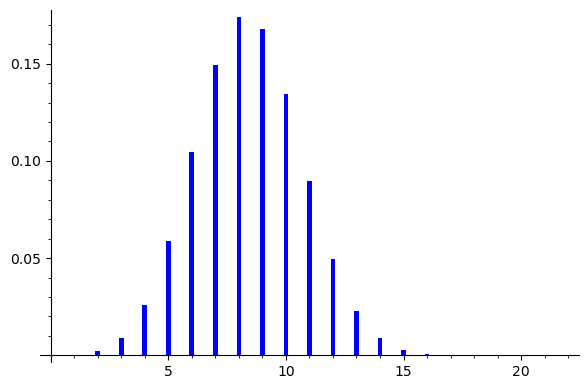

In [ ]:
bar_chart(s, width=0.2)

In [ ]:
p = 0.4
q = 1 - p
n = 21  # počet opakování pokusu
l = int(n*p - q); h = int(n*p + p)
print("l = 'dolní odhad' = ", l)
print("h = 'horní odhad' = ", h)

l = 'dolní odhad' =  7
h = 'horní odhad' =  8


## Příklad

Výstupní kontrola prověřuje 24 výrobků. Pravděpodobnost toho, že je výrobek kvalitní je rovna 0.6. Najděme nejpravděpodobnější počet kvalitních výrobků.

**Řešení.**

In [ ]:
p = 0.6
q = 1 - p
n = 24
l = int(n*p - q); h = int(n*p + p)
print("l = 'dolní odhad' = ", l)
print("h = 'horní odhad' = ", h)

l = 'dolní odhad' =  13
h = 'horní odhad' =  14


In [ ]:
N = 24
s = [pst(k = i, n=N, p = 0.6) for i in range(N+1)]
print(s)
print("-"*50)
m = max(s)
print("max pravděpodobnost:  ", numerical_approx(m, digits=4))
modus = s.index(m)
print("Modus = ", modus)

[2.81474976710656e-10, 1.01330991615836e-8, 1.74795960537318e-7, 1.92275556591049e-6, 0.0000151417000815451, 0.0000908502004892708, 0.000431538452324036, 0.00166450545896414, 0.00530561115044819, 0.0141482964011952, 0.0318336669026892, 0.0607733640869520, 0.0987567166412970, 0.136740069195642, 0.161157938694864, 0.161157938694864, 0.135977010773791, 0.0959837723109115, 0.0559905338480317, 0.0265218318227519, 0.00994568693353194, 0.00284162483815198, 0.000581241444167451, 0.0000758141014131458, 4.73838133832161e-6]
--------------------------------------------------
max pravděpodobnost:   0.1612
Modus =  14


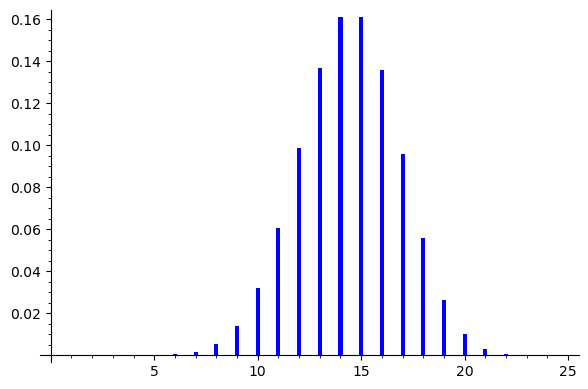

In [ ]:
bar_chart(s, width=0.2)

Modus je tedy roven buď hodnotě k = 14 nebo hodnotě k=15.Pravděpodobnost, že 14 nebo 15 výrobků projde kontrolou je přibližně rovna číslu: 0.16.

## Příklad

Dva střelci střílí na cíl. Pravděpodobnost, že první resp. druhý střelec při jednom výstřelu mine cíl, je $p_1 = 0.2$, resp. $p_2 = 0.4$. Najděme nejpravděpodobnější počet společných výstřelů obou střelců, při nichž ani jeden nezasáhne cíl, jestliže bylo společně vystřeleno celkem 25 krát.

**Řešení.**

In [ ]:
p1 = 0.2; p2 = 0.4
N = 25
s = [pst(k=i, p=p1*p2, n=N) for i in range(N+1)]
m = max(s)
modus = s.index(m)
print("Modus = ", modus)

Modus =  2


In [ ]:
print("Maximální pravděpodobnost je rovna: ", numerical_approx(s[2], digits=2))

Maximální pravděpodobnost je rovna:  0.28


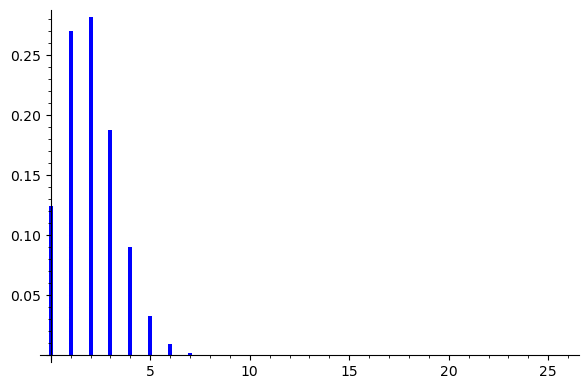

In [ ]:
bar_chart(s, width=0.2)

**Odpověď.**

Nejpravděpodobnější je, že oba střelci zároveň minou cíl při dvou společných výstřelech.